In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mplsoccer.pitch import Pitch
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")

data.columns

data.shape

columns = ['Name',"Age","Overall","Nationality","Position","Wage",
           'Stamina','Dribbling','BallControl','Crossing','Penalties',]

In [6]:
data = data[columns]

In [7]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

The wage feature contains a euro sign, so it has to be removed to make it numeric.

In [8]:
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

In [9]:
data.head()

Name  Age  Overall Nationality Position      Wage  Stamina  \
0           L. Messi   31       94   Argentina       RF  565000.0     72.0   
1  Cristiano Ronaldo   33       94    Portugal       ST  405000.0     88.0   
2          Neymar Jr   26       92      Brazil       LW  290000.0     81.0   
3             De Gea   27       91       Spain       GK  260000.0     43.0   
4       K. De Bruyne   27       91     Belgium      RCM  355000.0     90.0   

   Dribbling  BallControl  Crossing  Penalties  
0       97.0         96.0      84.0       75.0  
1       88.0         94.0      84.0       85.0  
2       96.0         95.0      79.0       81.0  
3       18.0         42.0      17.0       40.0  
4       86.0         91.0      93.0       79.0

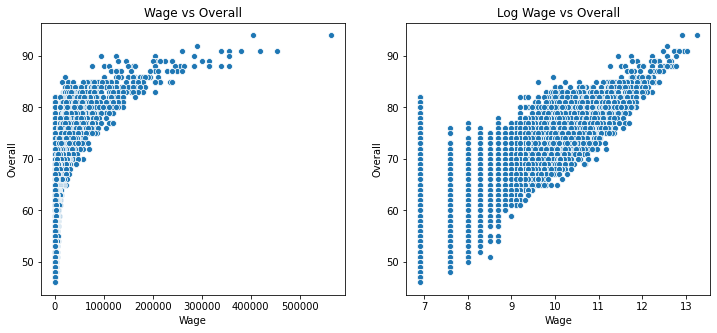

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data.Wage, data.Overall)
plt.title("Wage vs Overall")
plt.subplot(1,2,2)
sns.scatterplot(np.log(data.Wage), data.Overall)
plt.title("Log Wage vs Overall")
plt.show()

It is visible that the Overall score is positively correlated with the player wage. In the first plot, we can see that salaries and Overall have huge differences, so it is better to logarithm the wage. In the second plot, we can see the log wage, and now it is clear that there is a positive correlation.

In [11]:
Spain = data[data.Nationality == "Spain"]
England = data[data.Nationality == "England"]
Argentina = data[data.Nationality == "Argentina"]
Germany = data[data.Nationality == "Germany"]

I decided to take four countries such as Spain, England, Argentina and Germany where I think football is developed and there are many football players from these countries that play now in the most famous football clubs. I will analyze football players for each country and derive conclusions based on visualizations.

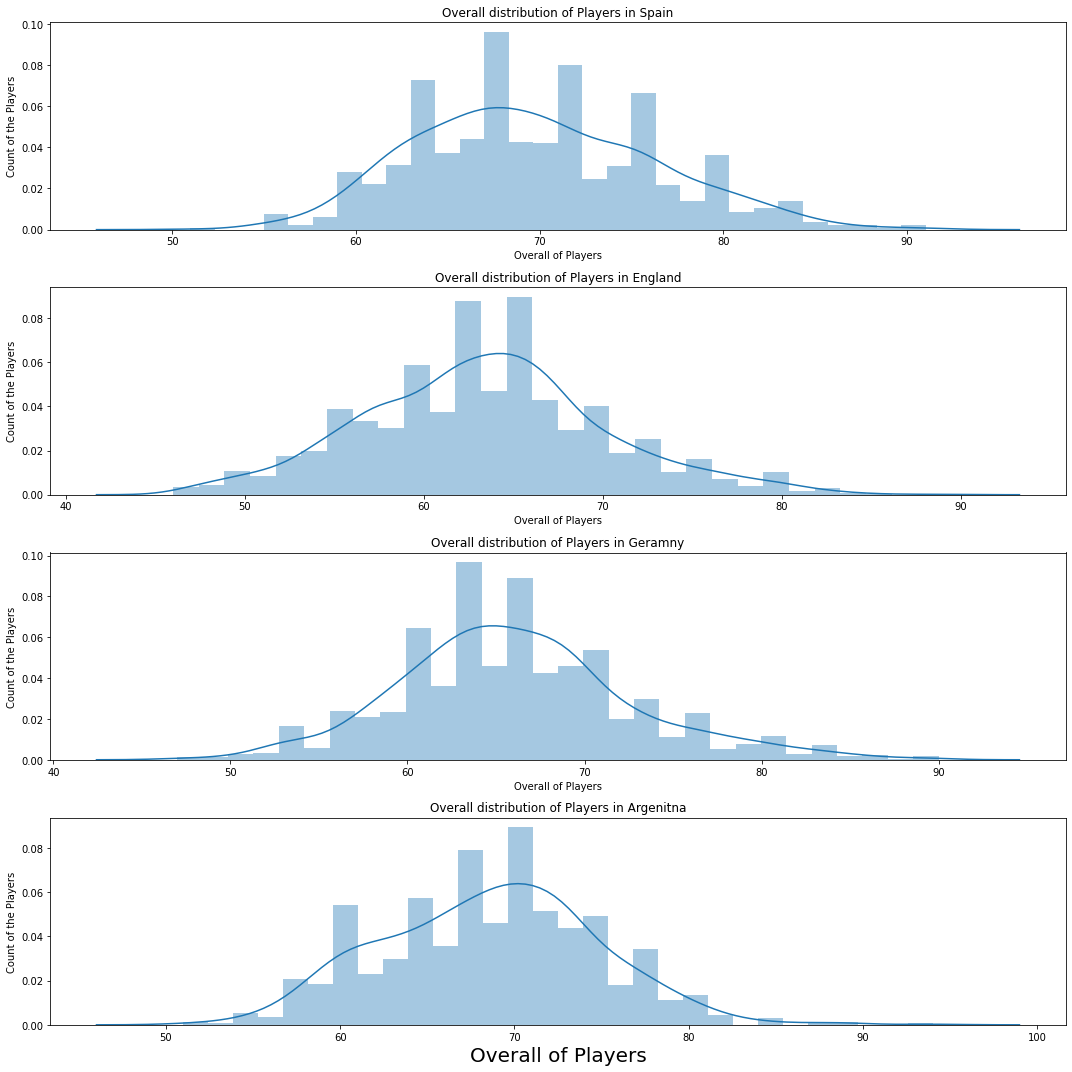

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
sns.distplot(Spain["Overall"], bins=30)
plt.xlabel('Overall of Players' )
plt.ylabel('Count of the Players')
plt.title('Overall distribution of Players in Spain')
plt.xticks(rotation = 0)
plt.subplot(4,1,2)
plt.tight_layout()
sns.distplot(England["Overall"], bins=30)
plt.xlabel('Overall of Players')
plt.ylabel('Count of the Players')
plt.title('Overall distribution of Players in England')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.subplot(4,1,3)
sns.distplot(Germany["Overall"], bins=30)
plt.xlabel('Overall of Players',)
plt.ylabel('Count of the Players')
plt.title('Overall distribution of Players in Geramny')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.subplot(4,1,4)
sns.distplot(Argentina["Overall"], bins=30)
plt.xlabel('Overall of Players', fontsize =20)
plt.ylabel('Count of the Players')
plt.title('Overall distribution of Players in Argenitna')
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

In this section Overall score distribution is plotted for each country. They are mostly similar, but we can identify some differences. Mainly in Spain, we can see that there are more players above 70 compared with other countries. Moreover, in Argentina and Spain, most players are concentrated around 70 while in Germany and England it is 65.

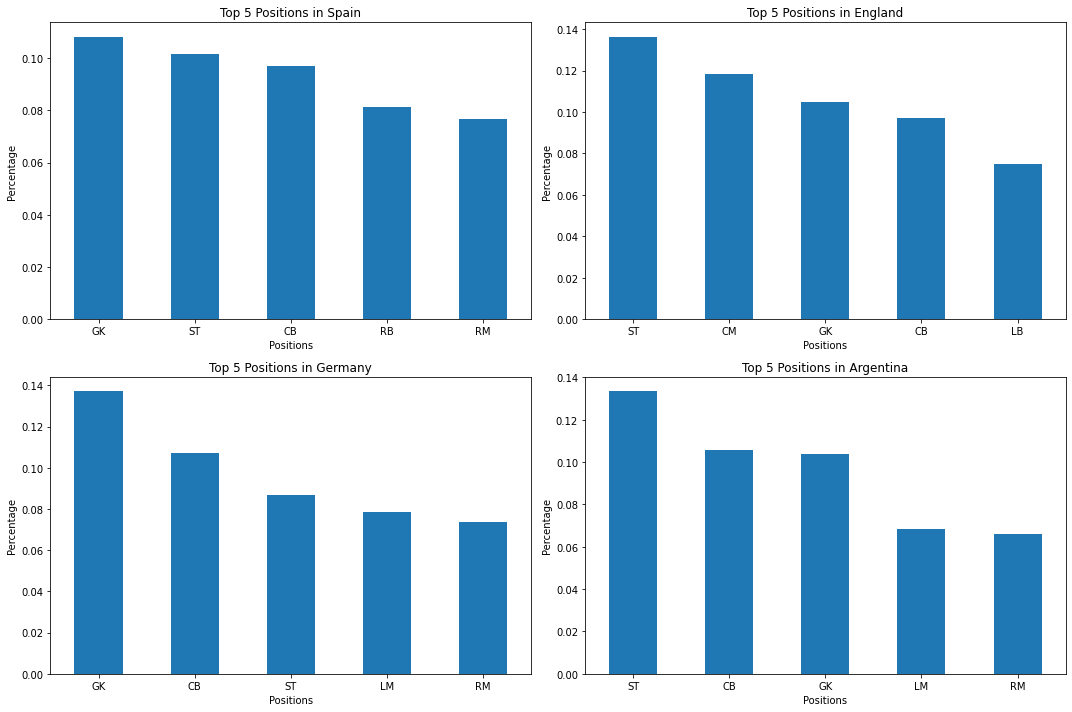

In [13]:
plt.figure(figsize=(15,10))
plt.title("Top 5 positions by country")
plt.subplot(2,2,1)
Spain["Position"].value_counts(normalize = True).head().plot(kind = "bar")
plt.xlabel('Positions' )
plt.ylabel('Percentage')
plt.title('Top 5 Positions in Spain')
plt.xticks(rotation = 0)
plt.subplot(2,2,2)
England["Position"].value_counts(normalize = True).head().plot(kind = "bar")
plt.xlabel('Positions' )
plt.ylabel('Percentage')
plt.title('Top 5 Positions in England')
plt.xticks(rotation = 0)
plt.subplot(2,2,3)
Germany["Position"].value_counts(normalize = True).head().plot(kind = "bar")
plt.xlabel('Positions' )
plt.ylabel('Percentage')
plt.title('Top 5 Positions in Germany')
plt.xticks(rotation = 0)
plt.subplot(2,2,4)
Argentina["Position"].value_counts(normalize = True).head().plot(kind = "bar")
plt.xlabel('Positions' )
plt.ylabel('Percentage')
plt.title('Top 5 Positions in Argentina')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

The bar plot illustrates information about the positions for each country.   
In Spain and Germany, most players are Goalkeepers (11% and about 14% respectively). In second place, 10 percent of Spain's players are strikers while in Germany it is the Central back position with 10 percent.
In England (about 13%) and Argentina (about 13%) in the first place are the Strikers. However, goalkeepers are in 3rd place for both countries. The central midfielder in England is in second place, while it is the Central back position in Argentina.



GK	Goalkeeper  
RB	Right Back  
CB	Center Back  
LB	Left Back  
RWB	Right Wing Back  
LWB	Left Wing Back  
CDM	Center Defensive Midfielder  
CM	Center Midfielder  
CAM	Center Attacking Midfielder  
RM	Right Midfielder  
LM	Left Midfielder  
RW	Right Wing  
LW	Left Wing  
CF	Center Forward  
ST	Striker  



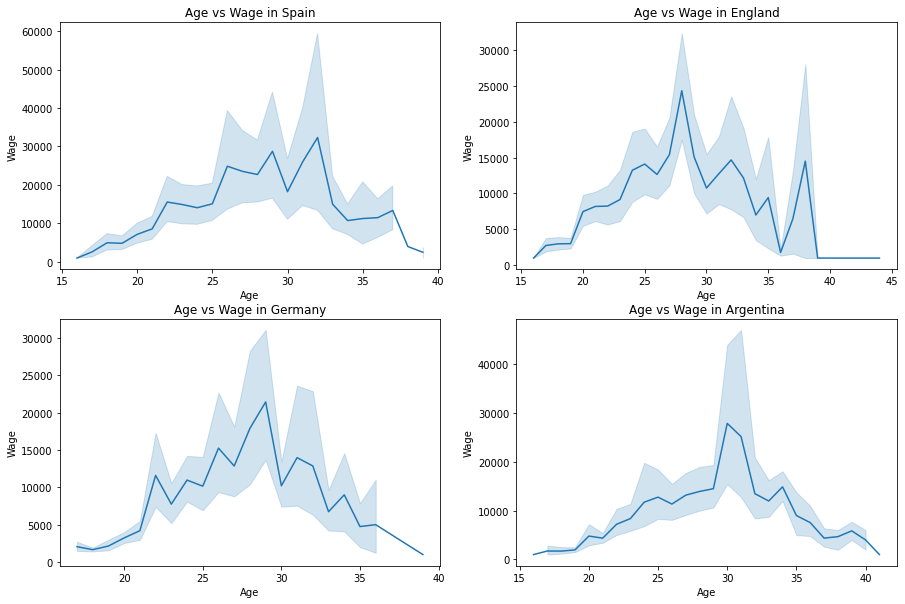

In [14]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.lineplot(Spain.Age, data.Wage)
plt.title("Age vs Wage in Spain")
plt.subplot(2,2,2)
sns.lineplot(England.Age, data.Wage)
plt.title("Age vs Wage in England")
plt.subplot(2,2,3)
sns.lineplot(Germany.Age, data.Wage)
plt.title("Age vs Wage in Germany")
plt.subplot(2,2,4)
sns.lineplot(Argentina.Age, data.Wage)
plt.title("Age vs Wage in Argentina")
plt.show()

The line plot demonstrates information about the Wage change in terms of players Age. It is noticeable that there are significant differences between countries.
Spanish footballers the highest wage players get at about age 32 (almost 32000 Euro) and after that the number of salaries starting to decrease until 38 which is around 5000 Euro.  
English player's Wage starts to grow at 15 and around at 28 it reaches its highest point around 25000 Euros after it the wages starting to decrease until 40. However, we can notice that 36-38 there is growth in wages.
German player's Wage reached its highest point at 28 around 20000 Euros and decreased until 40.  
Players from Argentina highest Wage gets in around 30 reaches around 20000 Euros and decreases as all until 40.  



We can also notice Confidence intervals for each plot with blue shades. For example, in Argentina, the blue shade at 30 increases above 40000, it can be because of Argentinian famous football player Messi.

Overall, we can see that there are differences between the countries for both Wage and Age features.

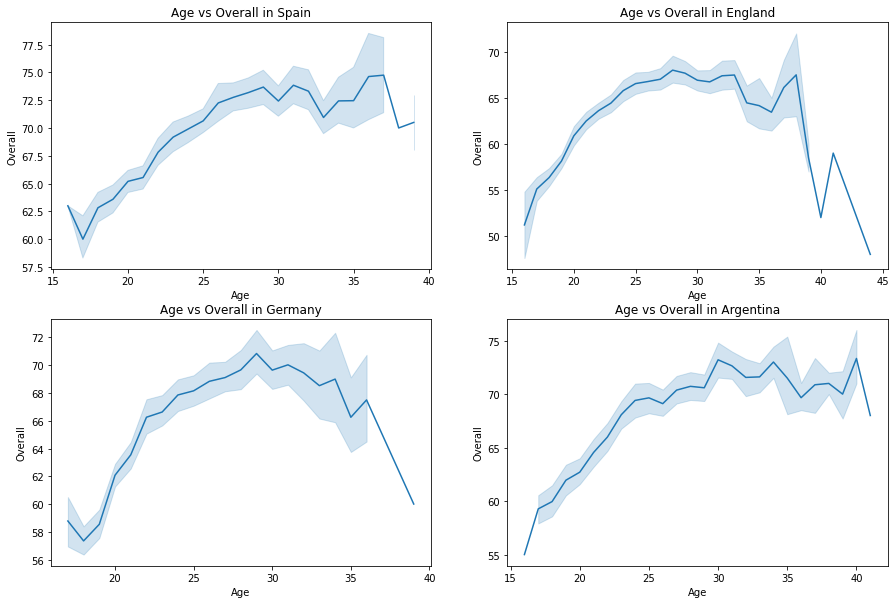

In [15]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.lineplot(Spain.Age, data.Overall)
plt.title("Age vs Overall in Spain")
plt.subplot(2,2,2)
sns.lineplot(England.Age, data.Overall)
plt.title("Age vs Overall in England")
plt.subplot(2,2,3)
sns.lineplot(Germany.Age, data.Overall)
plt.title("Age vs Overall in Germany")
plt.subplot(2,2,4)
sns.lineplot(Argentina.Age, data.Overall)
plt.title("Age vs Overall in Argentina")
plt.show()

As, in the previous plot, in this plot, we can see Age vs. Overall score. Every player has an Overall score in the Fifa 19 game, which can identify the players' overall strengths.

Spanish footballers Overall score starts at age 16 with an overall score of 62.5. However, the overall score decreases until age 18, after which we can notice that it starts to increase until 25 and keeping its stability with a range of 72.5 to 75.

Compared to Spanish players, English players start their career around 52 and reach 65 at age 25 and get the highest point 26-28 68, after at age 38 overall score decreases dramatically until 50.

German players start their career from 18 (59 Overall scores), at age 28 overall score reaches the highest point around 70 and 38 as in English, the overall score decreases around 60.  

Argentinian player's overall score starts from 55 and goes up until 73 at age 30, and compared with other countries' players; it keeps its stability.

To conclude, there are differences between the players of these four countries. For example, In Spain, the difference is significant because players' overall score starts formv62,5 while in England, Germany, and Argentina it is 52,59 and 55. We can also notice differences between the overall scores and ages in the four countries.




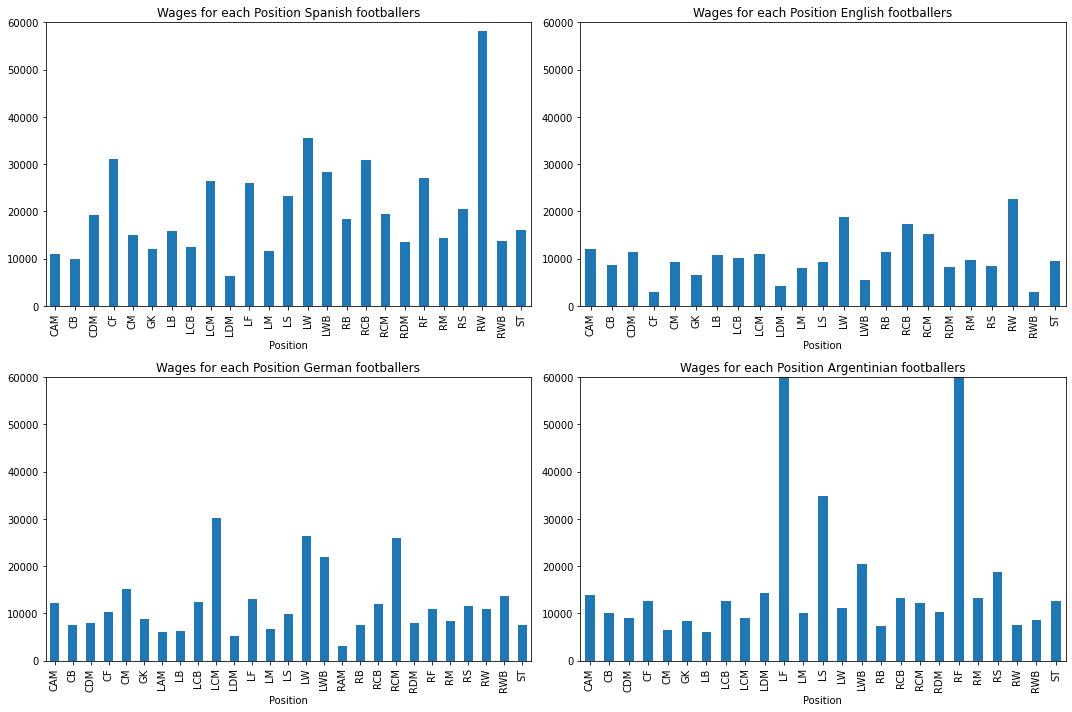

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
Spain.groupby("Position")["Wage"].mean().plot(kind ="bar")
plt.title("Wages for each Position Spanish footballers")
plt.ylim(0,60000)
plt.subplot(2,2,2)
England.groupby("Position")["Wage"].mean().plot(kind ="bar")
plt.title("Wages for each Position English footballers")
plt.ylim(0,60000)
plt.subplot(2,2,3)
Germany.groupby("Position")["Wage"].mean().plot(kind ="bar")
plt.title("Wages for each Position German footballers")
plt.ylim(0,60000)
plt.subplot(2,2,4)
Argentina.groupby("Position")["Wage"].mean().plot(kind ="bar")
plt.title("Wages for each Position Argentinian footballers")
plt.ylim(0,60000)
plt.tight_layout()

In this bar plot, we can see the mean wages by positions; the y axis limit is set at 60000 to make it easier for evaluation.

It is noticeable that there are huge differences. 

The highest Mean wage for Spanish players is Right Wingers (around 58000 euros), lowest Left Defensive Midfielder ( below 10000 Euros)  

The Highest Mean wage for English players is Right Wingers (above 20000 euros), lowest Center Forwarders and Right-Wing Bakcers ( below 5000 Euros)  

The highest Mean wage from German players is Left Centre Midfielder (30000 euros), lowest Center Forwarders and Right Attacking Midfielder  ( below 5000 Euros).  

The highest Mean wage from Argentinian players is Right Forwarders (above 60000 euros) lowest Central Midfielder(around 5000 Euros).  


To conclude we can see there are different wages by positions in these four countries. We can say the overall Spanish players get the highest salaries when looking at the bar chart.








In [17]:
bbox=dict(boxstyle = "square",facecolor = "#34ebe5")
bbox1=dict(boxstyle = "square",facecolor = "#c92247")
bbox2=dict(boxstyle = "square",facecolor = "#92cc1d")
bbox3=dict(boxstyle = "square",facecolor = "#1815d1")
bbox4=dict(boxstyle = "square",facecolor = "#0da60a")
bbox5=dict(boxstyle = "square",facecolor = "#e0a046")
bbox6=dict(boxstyle = "square",facecolor = "#544e46")
bbox7=dict(boxstyle = "square",facecolor = "#b84fc2")
bbox8=dict(boxstyle = "square",facecolor = "#4f8cc2")
bbox9=dict(boxstyle = "square",facecolor = "#0b7325")
bbox10=dict(boxstyle = "square",facecolor = "#850307")
bbox11=dict(boxstyle = "square",facecolor = "#d602a1")
bbox12=dict(boxstyle = "square",facecolor = "#b59a00")
bbox13=dict(boxstyle = "square",facecolor = "#b8b5a3")
bbox14=dict(boxstyle = "square",facecolor = "#000000")

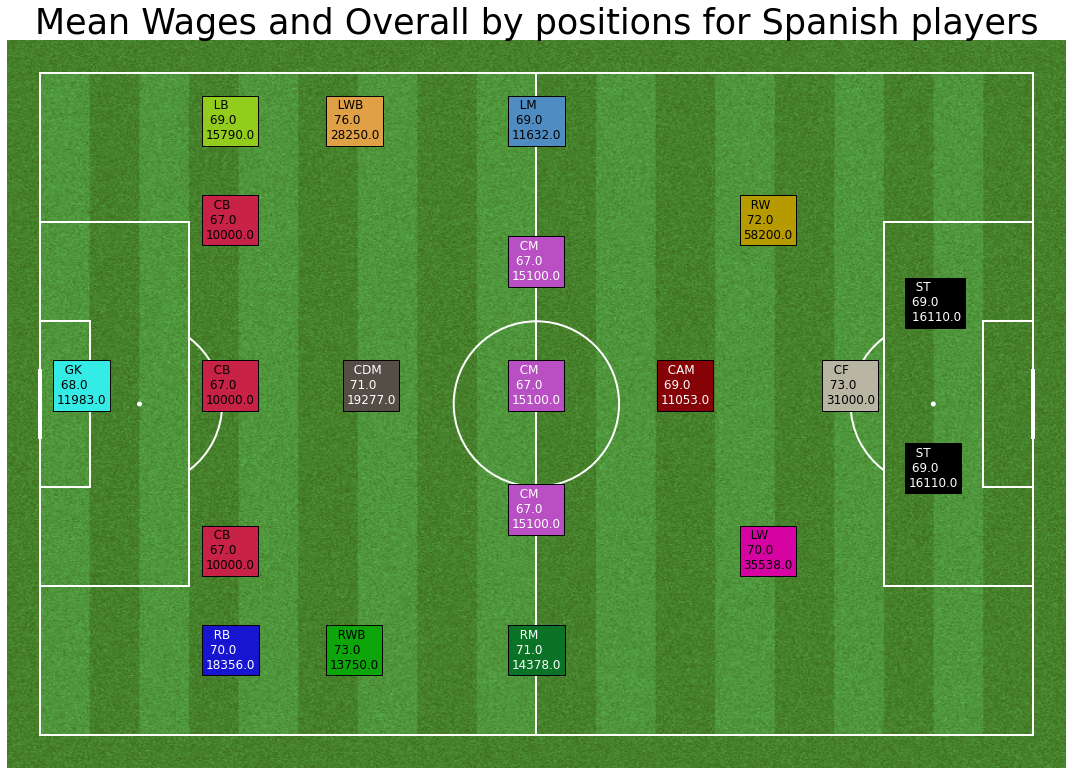

In [27]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize = (15,15))
fig, ax = pitch.draw()
plt.title("Mean Wages and Overall by positions for Spanish players", fontsize = 35)
ax.annotate(f"  GK\n {np.round(Spain[data.Position == 'GK'].mean().Overall)} \n{np.round(Spain[data.Position == 'GK'].mean().Wage)}",xy = (2,40), bbox = bbox, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Spain[data.Position == 'CB'].mean().Overall)} \n{np.round(Spain[data.Position == 'CB'].mean().Wage)}",xy = (20,60), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Spain[data.Position == 'CB'].mean().Overall)} \n{np.round(Spain[data.Position == 'CB'].mean().Wage)}",xy = (20,40), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Spain[data.Position == 'CB'].mean().Overall)} \n{np.round(Spain[data.Position == 'CB'].mean().Wage)}",xy = (20,20), bbox = bbox1, fontsize = 12)
ax.annotate(f"  LB\n {np.round(Spain[data.Position == 'LB'].mean().Overall)} \n{np.round(Spain[data.Position == 'LB'].mean().Wage)}",xy = (20,8), bbox = bbox2, fontsize = 12)
ax.annotate(f"  RB\n {np.round(Spain[data.Position == 'RB'].mean().Overall)} \n{np.round(Spain[data.Position == 'RB'].mean().Wage)}",xy = (20,72), bbox = bbox3, fontsize = 12,color = "white")
ax.annotate(f"  RWB\n {np.round(Spain[data.Position == 'RWB'].mean().Overall)} \n{np.round(Spain[data.Position == 'RWB'].mean().Wage)}",xy = (35,72), bbox = bbox4, fontsize = 12)
ax.annotate(f"  LWB\n {np.round(Spain[data.Position == 'LWB'].mean().Overall)} \n{np.round(Spain[data.Position == 'LWB'].mean().Wage)}",xy = (35,8), bbox = bbox5, fontsize = 12)
ax.annotate(f"  CDM\n {np.round(Spain[data.Position == 'CDM'].mean().Overall)} \n{np.round(Spain[data.Position == 'CDM'].mean().Wage)}",xy = (37,40), bbox = bbox6, fontsize = 12, color = "white")
ax.annotate(f"  CM\n {np.round(Spain[data.Position == 'CM'].mean().Overall)}\n{np.round(Spain[data.Position == 'CM'].mean().Wage)}",xy = (57,55), bbox = bbox7, fontsize = 12, color = "white")
ax.annotate(f"  CM\n {np.round(Spain[data.Position == 'CM'].mean().Overall)}\n{np.round(Spain[data.Position == 'CM'].mean().Wage)}",xy = (57,40), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  CM\n {np.round(Spain[data.Position == 'CM'].mean().Overall)}\n{np.round(Spain[data.Position == 'CM'].mean().Wage)}",xy = (57,25), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  LM\n {np.round(Spain[data.Position == 'LM'].mean().Overall)} \n{np.round(Spain[data.Position == 'LM'].mean().Wage)}",xy = (57,8), bbox = bbox8, fontsize = 12)
ax.annotate(f"  RM\n {np.round(Spain[data.Position == 'RM'].mean().Overall)} \n{np.round(Spain[data.Position == 'RM'].mean().Wage)}",xy = (57,72), bbox = bbox9, fontsize = 12, color = "white")
ax.annotate(f"  CAM\n {np.round(Spain[data.Position == 'CAM'].mean().Overall)} \n{np.round(Spain[data.Position == 'CAM'].mean().Wage)}",xy = (75,40), bbox = bbox10, fontsize = 12, color = "white")
ax.annotate(f"  LW\n {np.round(Spain[data.Position == 'LW'].mean().Overall)}\n{np.round(Spain[data.Position == 'LW'].mean().Wage)}",xy = (85,60), bbox = bbox11, fontsize = 12)
ax.annotate(f"  RW\n {np.round(Spain[data.Position == 'RW'].mean().Overall)}\n{np.round(Spain[data.Position == 'RW'].mean().Wage)}",xy = (85,20), bbox = bbox12, fontsize = 12)
ax.annotate(f"  CF\n {np.round(Spain[data.Position == 'CF'].mean().Overall)}\n{np.round(Spain[data.Position == 'CF'].mean().Wage)}",xy = (95,40), bbox = bbox13, fontsize = 12)
ax.annotate(f"  ST\n {np.round(Spain[data.Position == 'ST'].mean().Overall)}\n{np.round(Spain[data.Position == 'ST'].mean().Wage)}",xy = (105,50), bbox = bbox14, fontsize = 12, color = "white")
ax.annotate(f"  ST\n {np.round(Spain[data.Position == 'ST'].mean().Overall)}\n {np.round(Spain[data.Position == 'ST'].mean().Wage)}",xy = (105,30), bbox = bbox14, fontsize = 12, color = "white")
plt.savefig("Spanish")

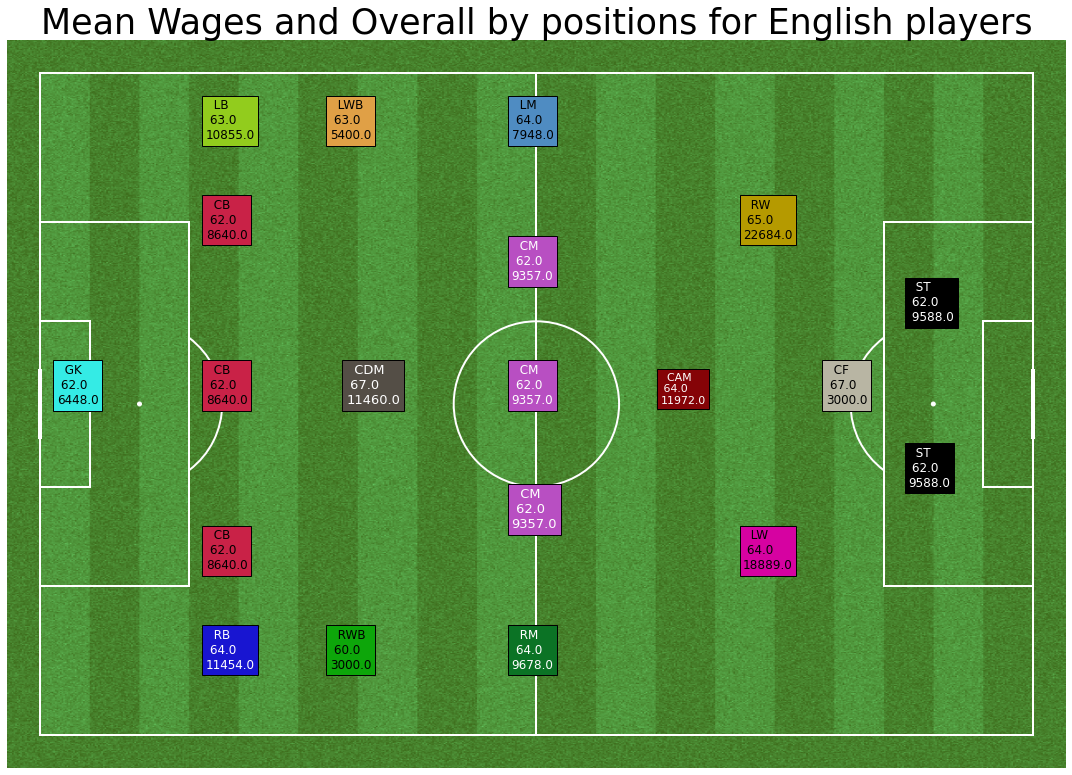

In [23]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize = (15,15))
fig, ax = pitch.draw()
plt.title("Mean Wages and Overall by positions for English players", fontsize = 35)
ax.annotate(f"  GK\n {np.round(England[data.Position == 'GK'].mean().Overall)} \n{np.round(England[data.Position == 'GK'].mean().Wage)}",xy = (2,40), bbox = bbox, fontsize = 12)
ax.annotate(f"  CB\n {np.round(England[data.Position == 'CB'].mean().Overall)} \n{np.round(England[data.Position == 'CB'].mean().Wage)}",xy = (20,60), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(England[data.Position == 'CB'].mean().Overall)} \n{np.round(England[data.Position == 'CB'].mean().Wage)}",xy = (20,40), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(England[data.Position == 'CB'].mean().Overall)} \n{np.round(England[data.Position == 'CB'].mean().Wage)}",xy = (20,20), bbox = bbox1, fontsize = 12)
ax.annotate(f"  LB\n {np.round(England[data.Position == 'LB'].mean().Overall)} \n{np.round(England[data.Position == 'LB'].mean().Wage)}",xy = (20,8), bbox = bbox2, fontsize = 12)
ax.annotate(f"  RB\n {np.round(England[data.Position == 'RB'].mean().Overall)} \n{np.round(England[data.Position == 'RB'].mean().Wage)}",xy = (20,72), bbox = bbox3, fontsize = 12,color = "white")
ax.annotate(f"  RWB\n {np.round(England[data.Position == 'RWB'].mean().Overall)} \n{np.round(England[data.Position == 'RWB'].mean().Wage)}",xy = (35,72), bbox = bbox4, fontsize = 12)
ax.annotate(f"  LWB\n {np.round(England[data.Position == 'LWB'].mean().Overall)} \n{np.round(England[data.Position == 'LWB'].mean().Wage)}",xy = (35,8), bbox = bbox5, fontsize = 12)
ax.annotate(f"  CDM\n {np.round(England[data.Position == 'CDM'].mean().Overall)} \n{np.round(England[data.Position == 'CDM'].mean().Wage)}",xy = (37,40), bbox = bbox6, fontsize = 13, color = "white")
ax.annotate(f"  CM\n {np.round(England[data.Position == 'CM'].mean().Overall)}\n{np.round(England[data.Position == 'CM'].mean().Wage)}",xy = (57,55), bbox = bbox7, fontsize = 13,color = "white")
ax.annotate(f"  CM\n {np.round(England[data.Position == 'CM'].mean().Overall)}\n{np.round(England[data.Position == 'CM'].mean().Wage)}",xy = (57,40), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  CM\n {np.round(England[data.Position == 'CM'].mean().Overall)}\n{np.round(England[data.Position == 'CM'].mean().Wage)}",xy = (57,25), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  LM\n {np.round(England[data.Position == 'LM'].mean().Overall)} \n{np.round(England[data.Position == 'LM'].mean().Wage)}",xy = (57,8), bbox = bbox8, fontsize = 12)
ax.annotate(f"  RM\n {np.round(England[data.Position == 'RM'].mean().Overall)} \n{np.round(England[data.Position == 'RM'].mean().Wage)}",xy = (57,72), bbox = bbox9, fontsize = 12, color = "white")
ax.annotate(f"  CAM\n {np.round(England[data.Position == 'CAM'].mean().Overall)} \n{np.round(England[data.Position == 'CAM'].mean().Wage)}",xy = (75,40), bbox = bbox10, fontsize = 11, color = "white")
ax.annotate(f"  LW\n {np.round(England[data.Position == 'LW'].mean().Overall)}\n{np.round(England[data.Position == 'LW'].mean().Wage)}",xy = (85,60), bbox = bbox11, fontsize = 12)
ax.annotate(f"  RW\n {np.round(England[data.Position == 'RW'].mean().Overall)}\n{np.round(England[data.Position == 'RW'].mean().Wage)}",xy = (85,20), bbox = bbox12, fontsize = 12)
ax.annotate(f"  CF\n {np.round(England[data.Position == 'CF'].mean().Overall)}\n{np.round(England[data.Position == 'CF'].mean().Wage)}",xy = (95,40), bbox = bbox13, fontsize = 12)
ax.annotate(f"  ST\n {np.round(England[data.Position == 'ST'].mean().Overall)}\n{np.round(England[data.Position == 'ST'].mean().Wage)}",xy = (105,50), bbox = bbox14, fontsize = 12, color = "white")
ax.annotate(f"  ST\n {np.round(England[data.Position == 'ST'].mean().Overall)}\n {np.round(England[data.Position == 'ST'].mean().Wage)}",xy = (105,30), bbox = bbox14, fontsize = 12, color = "white")
plt.savefig("English")

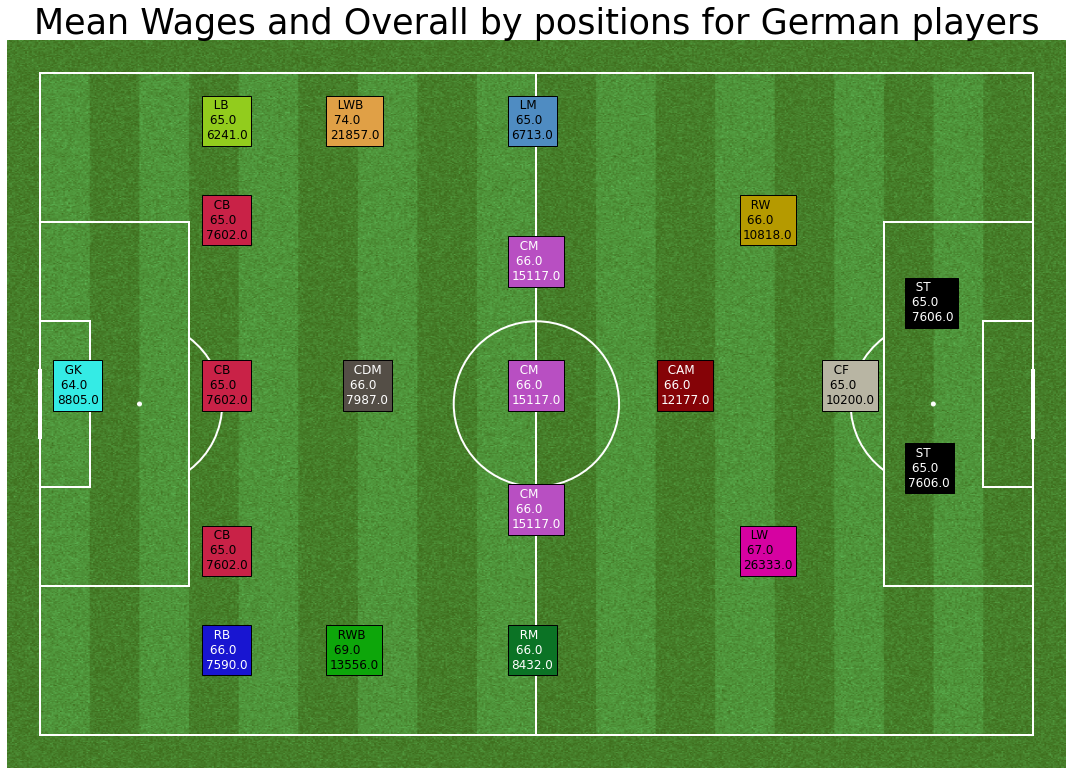

In [28]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize = (15,15))
fig, ax = pitch.draw()
plt.title("Mean Wages and Overall by positions for German players", fontsize = 35)
ax.annotate(f"  GK\n {np.round(Germany[data.Position == 'GK'].mean().Overall)} \n{np.round(Germany[data.Position == 'GK'].mean().Wage)}",xy = (2,40), bbox = bbox, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Germany[data.Position == 'CB'].mean().Overall)} \n{np.round(Germany[data.Position == 'CB'].mean().Wage)}",xy = (20,60), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Germany[data.Position == 'CB'].mean().Overall)} \n{np.round(Germany[data.Position == 'CB'].mean().Wage)}",xy = (20,40), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Germany[data.Position == 'CB'].mean().Overall)} \n{np.round(Germany[data.Position == 'CB'].mean().Wage)}",xy = (20,20), bbox = bbox1, fontsize = 12)
ax.annotate(f"  LB\n {np.round(Germany[data.Position == 'LB'].mean().Overall)} \n{np.round(Germany[data.Position == 'LB'].mean().Wage)}",xy = (20,8), bbox = bbox2, fontsize = 12)
ax.annotate(f"  RB\n {np.round(Germany[data.Position == 'RB'].mean().Overall)} \n{np.round(Germany[data.Position == 'RB'].mean().Wage)}",xy = (20,72), bbox = bbox3, fontsize = 12,color = "white")
ax.annotate(f"  RWB\n {np.round(Germany[data.Position == 'RWB'].mean().Overall)} \n{np.round(Germany[data.Position == 'RWB'].mean().Wage)}",xy = (35,72), bbox = bbox4, fontsize = 12)
ax.annotate(f"  LWB\n {np.round(Germany[data.Position == 'LWB'].mean().Overall)} \n{np.round(Germany[data.Position == 'LWB'].mean().Wage)}",xy = (35,8), bbox = bbox5, fontsize = 12)
ax.annotate(f"  CDM\n {np.round(Germany[data.Position == 'CDM'].mean().Overall)} \n{np.round(Germany[data.Position == 'CDM'].mean().Wage)}",xy = (37,40), bbox = bbox6, fontsize = 12, color = "white")
ax.annotate(f"  CM\n {np.round(Germany[data.Position == 'CM'].mean().Overall)}\n{np.round(Germany[data.Position == 'CM'].mean().Wage)}",xy = (57,55), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  CM\n {np.round(Germany[data.Position == 'CM'].mean().Overall)}\n{np.round(Germany[data.Position == 'CM'].mean().Wage)}",xy = (57,40), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  CM\n {np.round(Germany[data.Position == 'CM'].mean().Overall)}\n{np.round(Germany[data.Position == 'CM'].mean().Wage)}",xy = (57,25), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  LM\n {np.round(Germany[data.Position == 'LM'].mean().Overall)} \n{np.round(Germany[data.Position == 'LM'].mean().Wage)}",xy = (57,8), bbox = bbox8, fontsize = 12)
ax.annotate(f"  RM\n {np.round(Germany[data.Position == 'RM'].mean().Overall)} \n{np.round(Germany[data.Position == 'RM'].mean().Wage)}",xy = (57,72), bbox = bbox9, fontsize = 12, color = "white")
ax.annotate(f"  CAM\n {np.round(Germany[data.Position == 'CAM'].mean().Overall)} \n{np.round(Germany[data.Position == 'CAM'].mean().Wage)}",xy = (75,40), bbox = bbox10, fontsize = 12, color = "white")
ax.annotate(f"  LW\n {np.round(Germany[data.Position == 'LW'].mean().Overall)}\n{np.round(Germany[data.Position == 'LW'].mean().Wage)}",xy = (85,60), bbox = bbox11, fontsize = 12)
ax.annotate(f"  RW\n {np.round(Germany[data.Position == 'RW'].mean().Overall)}\n{np.round(Germany[data.Position == 'RW'].mean().Wage)}",xy = (85,20), bbox = bbox12, fontsize = 12)
ax.annotate(f"  CF\n {np.round(Germany[data.Position == 'CF'].mean().Overall)}\n{np.round(Germany[data.Position == 'CF'].mean().Wage)}",xy = (95,40), bbox = bbox13, fontsize = 12)
ax.annotate(f"  ST\n {np.round(Germany[data.Position == 'ST'].mean().Overall)}\n{np.round(Germany[data.Position == 'ST'].mean().Wage)}",xy = (105,50), bbox = bbox14, fontsize = 12, color = "white")
ax.annotate(f"  ST\n {np.round(Germany[data.Position == 'ST'].mean().Overall)}\n {np.round(Germany[data.Position == 'ST'].mean().Wage)}",xy = (105,30), bbox = bbox14, fontsize = 12, color = "white")
plt.savefig("German")

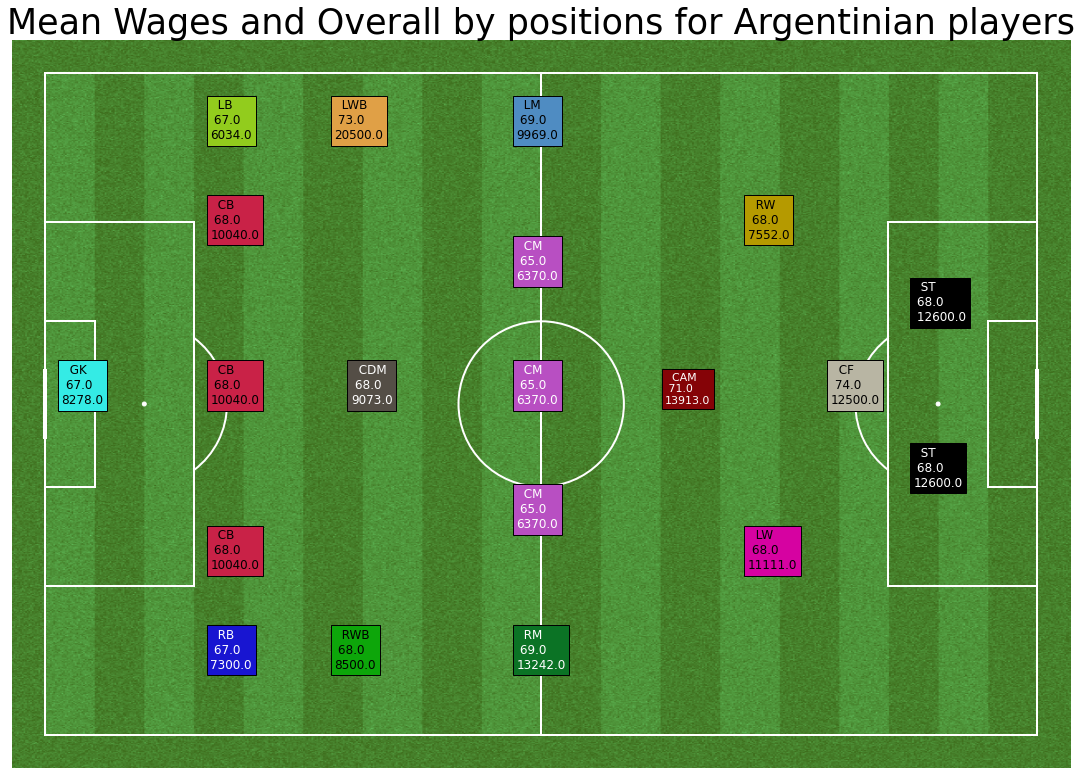

In [29]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize = (15,15))
fig, ax = pitch.draw()
plt.title("Mean Wages and Overall by positions for Argentinian players", fontsize = 35)
ax.annotate(f"  GK\n {np.round(Argentina[data.Position == 'GK'].mean().Overall)} \n{np.round(Argentina[data.Position == 'GK'].mean().Wage)}",xy = (2,40), bbox = bbox, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Argentina[data.Position == 'CB'].mean().Overall)} \n{np.round(Argentina[data.Position == 'CB'].mean().Wage)}",xy = (20,60), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Argentina[data.Position == 'CB'].mean().Overall)} \n{np.round(Argentina[data.Position == 'CB'].mean().Wage)}",xy = (20,40), bbox = bbox1, fontsize = 12)
ax.annotate(f"  CB\n {np.round(Argentina[data.Position == 'CB'].mean().Overall)} \n{np.round(Argentina[data.Position == 'CB'].mean().Wage)}",xy = (20,20), bbox = bbox1, fontsize = 12)
ax.annotate(f"  LB\n {np.round(Argentina[data.Position == 'LB'].mean().Overall)} \n{np.round(Argentina[data.Position == 'LB'].mean().Wage)}",xy = (20,8), bbox = bbox2, fontsize = 12)
ax.annotate(f"  RB\n {np.round(Argentina[data.Position == 'RB'].mean().Overall)} \n{np.round(Argentina[data.Position == 'RB'].mean().Wage)}",xy = (20,72), bbox = bbox3, fontsize = 12,color = "white")
ax.annotate(f"  RWB\n {np.round(Argentina[data.Position == 'RWB'].mean().Overall)} \n{np.round(Argentina[data.Position == 'RWB'].mean().Wage)}",xy = (35,72), bbox = bbox4, fontsize = 12)
ax.annotate(f"  LWB\n {np.round(Argentina[data.Position == 'LWB'].mean().Overall)} \n{np.round(Argentina[data.Position == 'LWB'].mean().Wage)}",xy = (35,8), bbox = bbox5, fontsize = 12)
ax.annotate(f"  CDM\n {np.round(Argentina[data.Position == 'CDM'].mean().Overall)} \n{np.round(Argentina[data.Position == 'CDM'].mean().Wage)}",xy = (37,40), bbox = bbox6, fontsize = 12, color = "white")
ax.annotate(f"  CM\n {np.round(Argentina[data.Position == 'CM'].mean().Overall)}\n{np.round(Argentina[data.Position == 'CM'].mean().Wage)}",xy = (57,55), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  CM\n {np.round(Argentina[data.Position == 'CM'].mean().Overall)}\n{np.round(Argentina[data.Position == 'CM'].mean().Wage)}",xy = (57,40), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  CM\n {np.round(Argentina[data.Position == 'CM'].mean().Overall)}\n{np.round(Argentina[data.Position == 'CM'].mean().Wage)}",xy = (57,25), bbox = bbox7, fontsize = 12,color = "white")
ax.annotate(f"  LM\n {np.round(Argentina[data.Position == 'LM'].mean().Overall)} \n{np.round(Argentina[data.Position == 'LM'].mean().Wage)}",xy = (57,8), bbox = bbox8, fontsize = 12)
ax.annotate(f"  RM\n {np.round(Argentina[data.Position == 'RM'].mean().Overall)} \n{np.round(Argentina[data.Position == 'RM'].mean().Wage)}",xy = (57,72), bbox = bbox9, fontsize = 12, color = "white")
ax.annotate(f"  CAM\n {np.round(Argentina[data.Position == 'CAM'].mean().Overall)} \n{np.round(Argentina[data.Position == 'CAM'].mean().Wage)}",xy = (75,40), bbox = bbox10, fontsize = 11, color = "white")
ax.annotate(f"  LW\n {np.round(Argentina[data.Position == 'LW'].mean().Overall)}\n{np.round(Argentina[data.Position == 'LW'].mean().Wage)}",xy = (85,60), bbox = bbox11, fontsize = 12)
ax.annotate(f"  RW\n {np.round(Argentina[data.Position == 'RW'].mean().Overall)}\n{np.round(Argentina[data.Position == 'RW'].mean().Wage)}",xy = (85,20), bbox = bbox12, fontsize = 12)
ax.annotate(f"  CF\n {np.round(Argentina[data.Position == 'CF'].mean().Overall)}\n{np.round(Argentina[data.Position == 'CF'].mean().Wage)}",xy = (95,40), bbox = bbox13, fontsize = 12)
ax.annotate(f"  ST\n {np.round(Argentina[data.Position == 'ST'].mean().Overall)}\n{np.round(Argentina[data.Position == 'ST'].mean().Wage)}",xy = (105,50), bbox = bbox14, fontsize = 12, color = "white")
ax.annotate(f"  ST\n {np.round(Argentina[data.Position == 'ST'].mean().Overall)}\n {np.round(Argentina[data.Position == 'ST'].mean().Wage)}",xy = (105,30), bbox = bbox14, fontsize = 12, color = "white")
plt.savefig("Argentinian")